## March 19 HV Scan Plots
##### *Ella Majkic, PUMA Testing Phase*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("Sucessful Imports")

Sucessful Imports


In [2]:
#starting with first file go through computations (20 files -> 20 iterations)

VG = 0.8
VA = 1.6

#store cathode input charges in array [order is increasing VA and VG]
cathodeInputCharges = []

for _ in range(20): 
    file_name = f"HVscan_VA{round(VA, 2)}_VG{round(VG, 2)}.txt"
    #print(file_name)
    VG = VG + 0.8
    VA = VA + 1.6

    data = pd.read_csv(file_name, sep="\s+", skiprows=1, header=None)
    time = data.index  # row index represents time steps

    # taking cathode signal
    columnsToAvg = data.iloc[:, 0::2]  

    # average cathode signal over 10 runs
    avgCathodeSig = columnsToAvg.mean(axis=1) 

    # obtain baseline signal
    cathodeSig1 = data.iloc[:, 0]
    baseline = cathodeSig1.iloc[:4000].mean()

    avgCathodeMinusBaseline = avgCathodeSig - baseline
    
    #numerically integrate cathode signal to get pulse area (first approx. -> rectangles)
    pulseArea = avgCathodeMinusBaseline.sum()*(2)*(10**(-9))

    inputCharge = pulseArea / (220*10**(3))
    cathodeInputCharges.append(inputCharge)

print(cathodeInputCharges)    

[np.float64(7.970459545454547e-13), np.float64(8.103321818181821e-13), np.float64(6.60690090909091e-13), np.float64(8.714947272727275e-13), np.float64(7.818308636363637e-13), np.float64(7.325439545454547e-13), np.float64(8.148472727272727e-13), np.float64(7.855548636363636e-13), np.float64(7.879930909090911e-13), np.float64(8.798536363636364e-13), np.float64(9.04852409090909e-13), np.float64(8.268417727272727e-13), np.float64(6.634167272727273e-13), np.float64(8.185510909090908e-13), np.float64(5.880392272727274e-13), np.float64(8.701092272727277e-13), np.float64(8.993117272727269e-13), np.float64(7.489398181818183e-13), np.float64(7.575021363636362e-13), np.float64(7.789848636363635e-13)]


[1.6, 3.2, 4.8, 6.4, 8.0, 9.6, 11.2, 12.8, 14.4, 16.0, 17.6, 19.2, 20.8, 22.4, 24.0, 25.6, 27.2, 28.8, 30.4, 32.0]


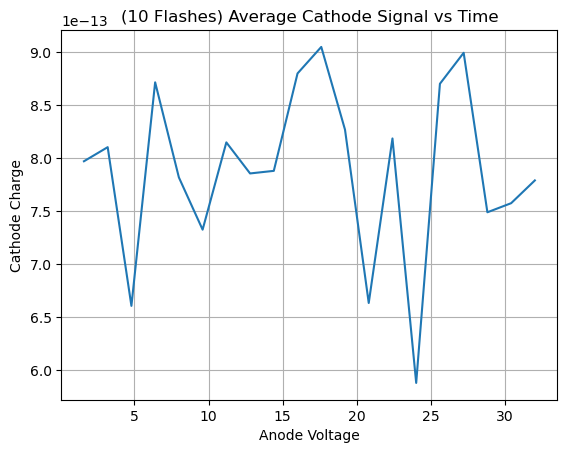

In [3]:
VA = []
i = 1.6

for _ in range(20): 
    VA.append(round(i, 2))
    i = i + 1.6

print(VA)

plt.plot(VA, cathodeInputCharges)
plt.xlabel('Anode Voltage')
plt.ylabel('Cathode Charge')
plt.title('(10 Flashes) Average Cathode Signal vs Time')
plt.grid(True)
plt.show()

#### Example Plot: VA = 1.6, VG = 0.8

In [17]:
data = pd.read_csv('HVscan_VA1.6_VG0.8.txt', sep="\s+", skiprows=1, header=None)
#print(data)

In [18]:
time = data.index  # row index represents time steps

# taking cathode signal
columnsToAvg = data.iloc[:, 0::2]  

# average cathode signal over 10 runs
avgCathodeSig = columnsToAvg.mean(axis=1)  

# plt.plot(time, avgCathodeSig)
# plt.xlabel('Time [10e-9]')
# plt.ylabel('Average Cathode Signal')
# plt.title('(10 Flashes) Average Cathode Signal vs Time')
# plt.grid(True)
# plt.show()

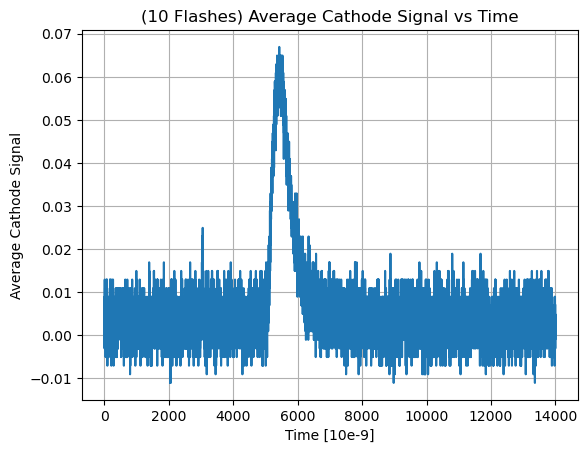

In [19]:
cathodeSig1 = data.iloc[:, 0]

baseline = cathodeSig1.iloc[:4000].mean()

avgCathodeMinusBaseline = avgCathodeSig - baseline

plt.plot(time, avgCathodeMinusBaseline)
plt.xlabel('Time [10e-9]')
plt.ylabel('Average Cathode Signal')
plt.title('(10 Flashes) Average Cathode Signal vs Time')
plt.grid(True)
plt.show()

In [20]:
#numerically integrate cathode signal to get pulse area (first approx. -> rectangles)
pulseArea = avgCathodeMinusBaseline.sum()*(2)*(10**(-9))
#print(pulseArea)

inputCharge = pulseArea / (220*10**(3))
#print(inputCharge)